RETAIL DIGITAL PAYMENTS IN INDIA UNDER NPCI PLATFORM

The main objective of this project is to understand the evolution of retail digital 
payment system in India especially the UPI platform which is an innovative 
digital payment method. 

In [1]:
library(tidyverse) 
library(ggplot2)
library(ggthemes)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "retailpaymentsindia"

In [2]:
Retail_pay<-read.csv("../input/retailpaymentsindia/RETAIL-PAYMENTS-STATISTICS-Dec-21.csv")
Retail_pay$Sr..No.<-NULL # removed sr. no. column
head(Retail_pay)
tail(Retail_pay)
str(Retail_pay)

,NPCI.Operated.Systems,F.Y.2014.15,X,F.Y.2015.16,X.1,Apr.16,X.2,May.16,X.3,June.16,⋯,Sep.21,X.72,Oct.21,X.73,Nov.21,X.74,Dec.21,X.75,F.Y.2021.22,X.76
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Financial Txns:,Volume (in Mn),Value (in Bn),Volume (in Mn),Value (in Bn),Volume (in Mn),Value (in Bn),Volume (in Mn),Value (in Bn),Volume (in Mn),⋯,Volume (in Mn),Value (in Bn),Volume (in Mn),Value (in Bn),Volume (in Mn),Value (in Bn),Volume (in Mn),Value (in Bn),Volume (in Mn),Value (in Bn)
2,NFS - National Financial Switch,"2,374.30","8,311.67","2,837.01","9,993.22",260.33,954.10,265.68,955.18,260.99,⋯,319.84,"1,294.47",350.88,"1,464.72",332.84,"1,392.28",341.16,"1,407.79","2,826.80","11,746.80"
3,NFS - ATM Cash Withdrawal *,"2,374.30","8,311.67","2,837.01","9,993.22",260.33,954.10,265.68,955.18,260.99,⋯,319.70,"1,292.98",350.73,"1,463.05",332.69,"1,390.70",340.99,"1,406.08","2,825.63","11,734.12"
4,NFS - Cash deposit transactions,-,-,-,-,,,,,,⋯,0.14,1.49,0.15,1.66,0.15,1.58,0.17,1.71,1.16,12.68
5,NACH- National Automated Clearing House,324.63,"1,196.97","1,392.79","3,715.09",168.34,544.54,154.36,530.34,160.25,⋯,253.33,"1,591.21",342.35,"1,934.61",311.23,"1,709.14",320.09,"1,925.10","2,769.12","15,519.73"
6,APBS Credit (Disbursement based on UIDAI No.),168.43,61.43,717.46,185.98,72.31,19.40,66.62,16.59,72.47,⋯,78.03,61.73,119.04,75.45,111.77,97.16,108.06,148.83,931.43,857.00


,NPCI.Operated.Systems,F.Y.2014.15,X,F.Y.2015.16,X.1,Apr.16,X.2,May.16,X.3,June.16,⋯,Sep.21,X.72,Oct.21,X.73,Nov.21,X.74,Dec.21,X.75,F.Y.2021.22,X.76
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
38,,,,,,,,,,,⋯,,,,,,,,,,
39,* NFS - ATM Cash Withdrawal - includes card+PIN transactions on micro-ATMs and does not include Card to Card Fund transfer transactions.,,,,,,,,,,⋯,,,,,,,,,,
40,,,,,,,,,,,⋯,,,,,,,,,,
41,,,,,,,,,,,⋯,,,,,,,,,,
42,,,,,,,,,,,⋯,,,,,,,,,,
43,,,,,,,,,,,⋯,,,,,,,,,,


'data.frame':	43 obs. of  155 variables:
 $ NPCI.Operated.Systems         : chr  "Financial Txns:" "NFS - National Financial Switch" "NFS - ATM Cash Withdrawal *" "NFS - Cash deposit transactions" ...
 $ F.Y.2014.15                   : chr  "Volume (in Mn)" " 2,374.30 " " 2,374.30 " " -   " ...
 $ X                             : chr  "Value (in Bn)" " 8,311.67 " " 8,311.67 " " -   " ...
 $ F.Y.2015.16                   : chr  "Volume (in Mn)" " 2,837.01 " " 2,837.01 " " -   " ...
 $ X.1                           : chr  "Value (in Bn)" " 9,993.22 " " 9,993.22 " " -   " ...
 $ Apr.16                        : chr  "Volume (in Mn)" " 260.33 " " 260.33 " "" ...
 $ X.2                           : chr  "Value (in Bn)" " 954.10 " " 954.10 " "" ...
 $ May.16                        : chr  "Volume (in Mn)" " 265.68 " " 265.68 " "" ...
 $ X.3                           : chr  "Value (in Bn)" " 955.18 " " 955.18 " "" ...
 $ June.16                       : chr  "Volume (in Mn)" " 260.99 " " 260.99 " 

Here, the First row :Financial Txns created problems. The data is also not in a proper format. Had to do data wrangling and clean up. There are some non financial transactions after row 22. Hence subsetting was done

In [3]:
Retail_pay<-Retail_pay[1:22,]
library(tidyr)
Retail_pay<-pivot_longer(Retail_pay, cols = 2:155, names_to ="year",
             values_to = "Values")# data table converted to the longer format
Retail_pay<-Retail_pay[155:3388,]#removed first 155 rows which were created as the result 
                    #of first row in the original table
Retail_pay

NPCI.Operated.Systems,year,Values
<chr>,<chr>,<chr>
NFS - National Financial Switch,F.Y.2014.15,"2,374.30"
NFS - National Financial Switch,X,"8,311.67"
NFS - National Financial Switch,F.Y.2015.16,"2,837.01"
NFS - National Financial Switch,X.1,"9,993.22"
NFS - National Financial Switch,Apr.16,260.33
NFS - National Financial Switch,X.2,954.10
NFS - National Financial Switch,May.16,265.68
NFS - National Financial Switch,X.3,955.18
NFS - National Financial Switch,June.16,260.99


Alternate row under year is marked with "X" series due to the structure of original data 
table (i.e. one year column was split in two sub columns of volume and value. Also need to add the volume_mn and Value_bn information to this table which was removed during wrangling and restructuring

In [4]:
Retail_pay$vol_Value <- rep(c("Volume_mn", "Value_bn"), length.out=nrow(Retail_pay)) # adding column for volume and value information
odd_indexes<-seq(1,nrow(Retail_pay),2)
even_indexes<-seq(2,nrow(Retail_pay),2)
Retail_pay[even_indexes, "year"] <-Retail_pay[odd_indexes,"year"]# replacing X series with year information
Retail_pay

NPCI.Operated.Systems,year,Values,vol_Value
<chr>,<chr>,<chr>,<chr>
NFS - National Financial Switch,F.Y.2014.15,"2,374.30",Volume_mn
NFS - National Financial Switch,F.Y.2014.15,"8,311.67",Value_bn
NFS - National Financial Switch,F.Y.2015.16,"2,837.01",Volume_mn
NFS - National Financial Switch,F.Y.2015.16,"9,993.22",Value_bn
NFS - National Financial Switch,Apr.16,260.33,Volume_mn
NFS - National Financial Switch,Apr.16,954.10,Value_bn
NFS - National Financial Switch,May.16,265.68,Volume_mn
NFS - National Financial Switch,May.16,955.18,Value_bn
NFS - National Financial Switch,June.16,260.99,Volume_mn


Need to spread the vol_Value column into two

In [5]:
Retail_payment<-spread(Retail_pay,vol_Value,Values)
#separating out FY data from month data into a new tibble
FYdata<-subset(Retail_payment,(year=="F.Y.2014.15"|year=="F.Y.2015.16"|
                             year=="F.Y.2016.17"|year=="F.Y.2017.18..Apr.17.to.Mar.18."|
                             year=="F.Y.2018.19"|year=="F.Y.2019.20"|
                             year=="F.Y.2020.21"|year=="F.Y.2021.22"))
head(Retail_payment)
head(FYdata)

NPCI.Operated.Systems,year,Value_bn,Volume_mn
<chr>,<chr>,<chr>,<chr>
ACH Credit,Apr.16,297.90,74.53
ACH Credit,Apr.17,563.86,75.58
ACH Credit,Apr.18,662.02,78.20
ACH Credit,Apr.19,776.15,108.27
ACH Credit,Apr.20,891.41,258.23
ACH Credit,Apr.21,"1,004.16",100.56


NPCI.Operated.Systems,year,Value_bn,Volume_mn
<chr>,<chr>,<chr>,<chr>
ACH Credit,F.Y.2014.15,52.32,80.83
ACH Credit,F.Y.2015.16,879.17,508.24
ACH Credit,F.Y.2016.17,"3,844.25",730.73
ACH Credit,F.Y.2017.18..Apr.17.to.Mar.18.,"5,210.42",703.27
ACH Credit,F.Y.2018.19,"7,296.73",883.43
ACH Credit,F.Y.2019.20,"10,380.40","1,114.96"


All the columns are in character format. Value and Volume need to be numeric, year need to be date.

In [6]:
library(lubridate)
library(zoo)
Retail_payment$year<-as.Date(as.yearmon(Retail_payment$year,"%b.%y"))#converting the dates 
#from original format to date format
Retail_payment<-na.omit(Retail_payment)# omitting rows if there are any NA in dates
#changing 3rd and 4th columns to numeric
Retail_payment[,3:4]<-lapply(Retail_payment[,3:4],
                             function(x){as.numeric(gsub(",", "", x))})
Retail_payment[is.na(Retail_payment)]=0 # replacing NA by 0 as there are no 
#transactions for that category on that date
head(Retail_payment)

FYdata[,3:4]<-lapply(FYdata[,3:4],
                             function(x){as.numeric(gsub(",", "", x))})
FYdata[is.na(FYdata)]=0 # replacing NA by 0 as there are no 
#transactions for that category on that date
head(FYdata)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


NPCI.Operated.Systems,year,Value_bn,Volume_mn
<chr>,<date>,<dbl>,<dbl>
ACH Credit,2016-04-01,297.90,74.53
ACH Credit,2017-04-01,563.86,75.58
ACH Credit,2018-04-01,662.02,78.20
ACH Credit,2019-04-01,776.15,108.27
ACH Credit,2020-04-01,891.41,258.23
ACH Credit,2021-04-01,1004.16,100.56


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


NPCI.Operated.Systems,year,Value_bn,Volume_mn
<chr>,<chr>,<dbl>,<dbl>
ACH Credit,F.Y.2014.15,52.32,80.83
ACH Credit,F.Y.2015.16,879.17,508.24
ACH Credit,F.Y.2016.17,3844.25,730.73
ACH Credit,F.Y.2017.18..Apr.17.to.Mar.18.,5210.42,703.27
ACH Credit,F.Y.2018.19,7296.73,883.43
ACH Credit,F.Y.2019.20,10380.40,1114.96


Need to change or simplify the NPCI.operated.System names

In [7]:
#Shortening the names of retail payment methods
library(stringr)
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*Inter Bank.*","AEPS_interbank")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*APBS.*","APBS_credit")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*BBPS.*","BBPS_BBPCU")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*Cheque.*","CTS_chq_clrng")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*Automated.*","NACH")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*ATM.*","NFS_ATM_wdrwl")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*deposit.*","NFS_cash_dpst")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*National.*","NFS")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*eCom.*","Rupay_ecom")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*POS.*","Rupay_POS")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*Unified.*","UPI")
Retail_payment$NPCI.Operated.Systems<-str_replace(Retail_payment$NPCI.Operated.Systems,
                                                 ".*excluding.*","UPI_ex_bhim_USSD")
unique(Retail_payment$NPCI.Operated.Systems)

[1] "ACH Credit"       "ACH Debit"        "AEPS_interbank"   "APBS_credit"     
 [5] "BBPS_BBPCU"       "BHIM"             "CTS_chq_clrng"    "IMPS "           
 [9] "NACH Credit"      "NACH Debit"       "NACH"             "NETC "           
[13] "NFS_ATM_wdrwl"    "NFS_cash_dpst"    "NFS"              "Rupay_ecom"      
[17] "Rupay_POS"        "UPI"              "UPI_ex_bhim_USSD" "USSD 1.0"        
[21] "USSD 2.0"

From original file, it is evident that some of the payment methods are sub categories of main methods. e.g. NACH has five sub categories and NFS has two subcategories. Hence plotting the graphs again with only main retail digital payment methods excludng the subcategories.

In [8]:
select<-c("NFS","NACH","CTS_chq_clrng","IMPS ","Rupay_POS","Rupay_ecom","UPI","AEPS_interbank","APBS_credit","BBPS_BBPCU")
Retail_payment_main<-Retail_payment[Retail_payment$NPCI.Operated.Systems %in% select,]
unique(Retail_payment_main$NPCI.Operated.Systems)

[1] "AEPS_interbank" "APBS_credit"    "BBPS_BBPCU"     "CTS_chq_clrng" 
 [5] "IMPS "          "NACH"           "NFS"            "Rupay_ecom"    
 [9] "Rupay_POS"      "UPI"

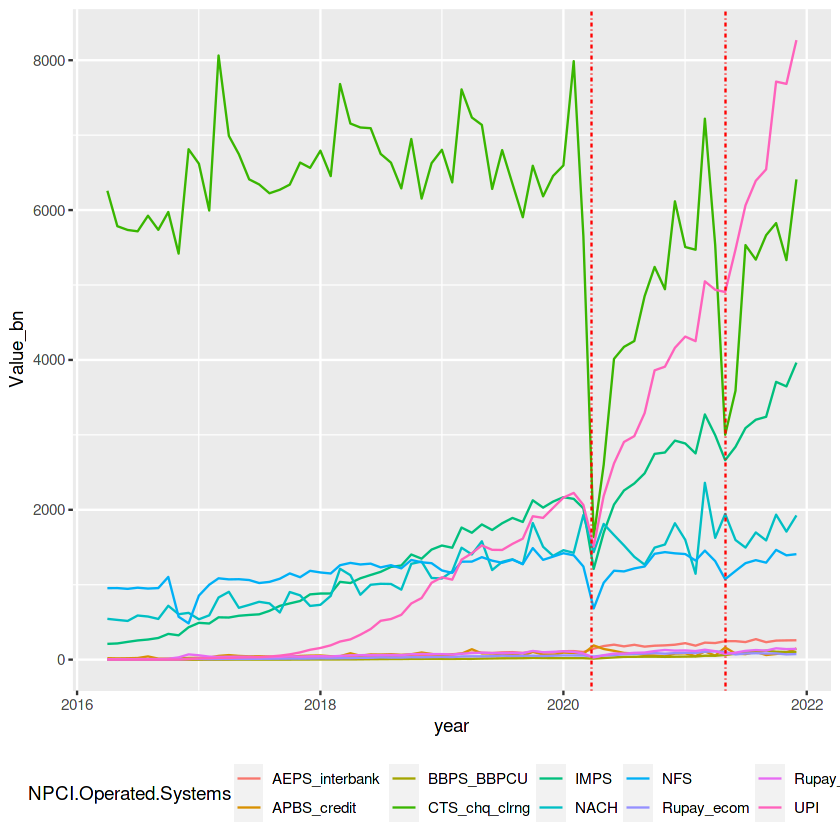

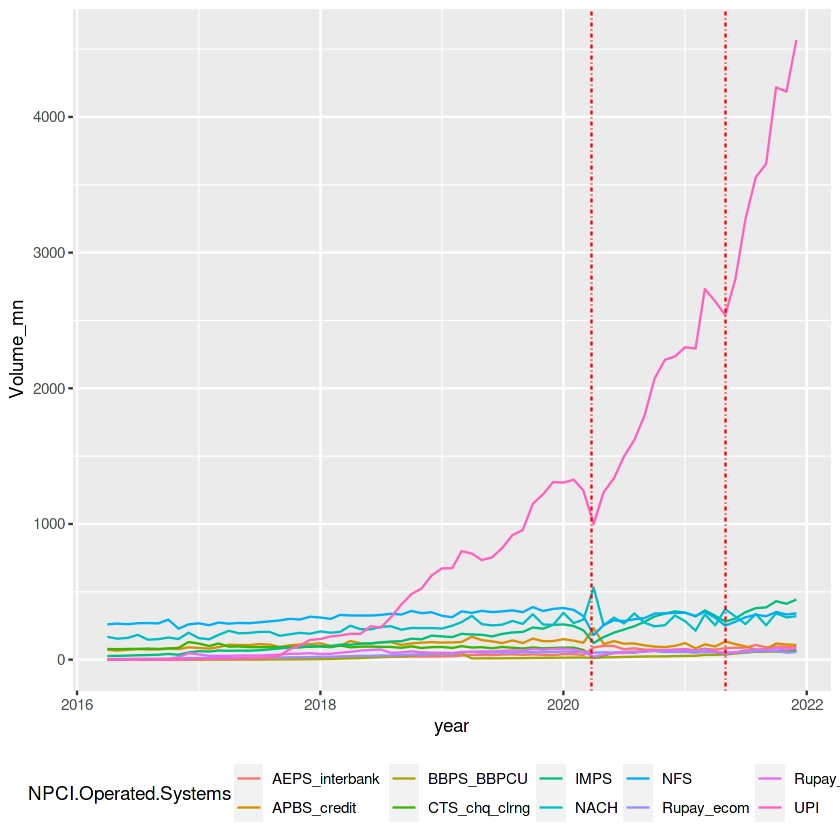

In [9]:

library(ggplot2)

plot<-ggplot(data=Retail_payment_main,aes(year,Value_bn,colour=NPCI.Operated.Systems))
plot+geom_line()+geom_vline(aes(xintercept=as.numeric(as.Date("2020-03-24"))),linetype=4,col="red")+
  geom_vline(aes(xintercept=as.numeric(as.Date("2021-05-01"))),linetype=4,col="red")+
theme(legend.position="bottom")

plot<-ggplot(data=Retail_payment_main,aes(year,Volume_mn,colour=NPCI.Operated.Systems))
plot+geom_line()+geom_vline(aes(xintercept=as.numeric(as.Date("2020-03-24"))),linetype=4,col="red")+
  geom_vline(aes(xintercept=as.numeric(as.Date("2021-05-01"))),linetype=4,col="red")+
theme(legend.position="bottom")

**Conclusion**

UPI which was launched in 2016 has picked up very fast and become the largest retail digital payment methods by volume as well as Value.Cheques, IMPS and NACH transactions were left far behind in terms of Volume. UPI surpassed Cheques, IMPS and NACH in May 2021 by Value as well. UPI is a true retail method with good penetration into untapped market. This also tells that there is still untapped market potential for digital retail transactions. In India, most of the retail transactions are still in Cash. UPI is changing that. Covid 1st wave lockdown (Apr 2020) and Covid 2nd wave impact are clearly seen with vertical dotted red lines.

The cheque transactions are high value transactions compared to other methods.

Now a look at retail transaction volume and value for financial year.

The FYdata subset which was prepared earlier is used here

In [10]:
str(FYdata)
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*Inter Bank.*","AEPS_interbank")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*APBS.*","APBS_credit")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*BBPS.*","BBPS_BBPCU")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*Cheque.*","CTS_chq_clrng")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*Automated.*","NACH")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*ATM.*","NFS_ATM_wdrwl")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*deposit.*","NFS_cash_dpst")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*National.*","NFS")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*eCom.*","Rupay_ecom")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*POS.*","Rupay_POS")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*Unified.*","UPI")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*excluding.*","UPI_ex_bhim_USSD")
FYdata$NPCI.Operated.Systems<-str_replace(FYdata$NPCI.Operated.Systems,
                                                 ".*IMPS.*","IMPS")
FYdata$NPCI.Operated.Systems<- as.factor(FYdata$NPCI.Operated.Systems)
select<-c("NFS","NACH","CTS_chq_clrng","IMPS","Rupay_POS","Rupay_ecom",
          "UPI","AEPS_interbank","APBS_credit","BBPS_BBPCU")
FYdataN<-FYdata[FYdata$NPCI.Operated.Systems %in% select,]
view(FYdataN)
unique(FYdata$NPCI.Operated.Systems)
unique(FYdataN$NPCI.Operated.Systems)

tibble [168 × 4] (S3: tbl_df/tbl/data.frame)
 $ NPCI.Operated.Systems: chr [1:168] "ACH Credit" "ACH Credit" "ACH Credit" "ACH Credit" ...
 $ year                 : chr [1:168] "F.Y.2014.15" "F.Y.2015.16" "F.Y.2016.17" "F.Y.2017.18..Apr.17.to.Mar.18." ...
 $ Value_bn             : num [1:168] 52.3 879.2 3844.2 5210.4 7296.7 ...
 $ Volume_mn            : num [1:168] 80.8 508.2 730.7 703.3 883.4 ...


[1] ACH Credit       ACH Debit        AEPS_interbank   APBS_credit     
 [5] BBPS_BBPCU       BHIM             CTS_chq_clrng    IMPS            
 [9] NACH Credit      NACH Debit       NACH             NETC            
[13] NFS_ATM_wdrwl    NFS_cash_dpst    NFS              Rupay_ecom      
[17] Rupay_POS        UPI              UPI_ex_bhim_USSD USSD 1.0        
[21] USSD 2.0        
21 Levels: ACH Credit ACH Debit AEPS_interbank APBS_credit BBPS_BBPCU ... USSD 2.0

[1] AEPS_interbank APBS_credit    BBPS_BBPCU     CTS_chq_clrng  IMPS          
 [6] NACH           NFS            Rupay_ecom     Rupay_POS      UPI           
21 Levels: ACH Credit ACH Debit AEPS_interbank APBS_credit BBPS_BBPCU ... USSD 2.0

In [11]:
FYdata1<-FYdataN[,1:3]
FYdataS<-pivot_wider(FYdata1,names_from = NPCI.Operated.Systems, values_from = Value_bn,values_fill = 0)
FYdataS$year<-str_replace(FYdataS$year,".*Mar.*","F.Y.2017.18")
colnames(FYdataS)

[1] "year"           "AEPS_interbank" "APBS_credit"    "BBPS_BBPCU"    
 [5] "CTS_chq_clrng"  "IMPS"           "NACH"           "NFS"           
 [9] "Rupay_ecom"     "Rupay_POS"      "UPI"

In [12]:
FYdata2<-FYdataN[,c(1:2,4)]
FYdataS2<-pivot_wider(FYdata2,names_from = NPCI.Operated.Systems, values_from = Volume_mn,values_fill = 0)
FYdataS2$year<-str_replace(FYdataS2$year,".*Mar.*","F.Y.2017.18")
colnames(FYdataS2)

[1] "year"           "AEPS_interbank" "APBS_credit"    "BBPS_BBPCU"    
 [5] "CTS_chq_clrng"  "IMPS"           "NACH"           "NFS"           
 [9] "Rupay_ecom"     "Rupay_POS"      "UPI"

In [13]:
library(plotly)
library(htmlwidgets)
library('IRdisplay')
#NFS","NACH","CTS_chq_clrng","IMPS","Rupay_POS",
#"Rupay_ecom","UPI","AEPS_interbank","APBS_credit","BBPS_BBPCU"

fig1 <- plot_ly(FYdataS, x = ~year, y = ~NFS, type = 'bar', name = 'NFS')
fig1 <- fig1 %>% add_trace(y = ~NACH, name = 'NACH')
fig1 <- fig1 %>% add_trace(y = ~IMPS, name = 'IMPS')
fig1 <- fig1 %>% add_trace(y = ~CTS_chq_clrng, name = 'Cheque clrng')
fig1 <- fig1 %>% add_trace(y = ~Rupay_POS, name = 'Rupay POS')
fig1 <- fig1 %>% add_trace(y = ~Rupay_ecom, name = 'Rupay ecom')
fig1 <- fig1 %>% add_trace(y = ~UPI, name = 'UPI')
fig1 <- fig1 %>% add_trace(y = ~AEPS_interbank, name = 'AEPS interbank')
fig1 <- fig1 %>% add_trace(y = ~APBS_credit, name = 'APBS credit')
fig1 <- fig1 %>% add_trace(y = ~BBPS_BBPCU, name = 'BBPS BBPCU')
fig1 <- fig1 %>% layout(yaxis = list(title = 'Value in bn Rs'), barmode = 'stack')
saveWidget(fig1, "fig1.html")
display_html('<iframe src="fig1.html" width=100% height=450></iframe>')


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config




In [14]:
fig2 <- plot_ly(FYdataS2, x = ~year, y = ~NFS, type = 'bar', name = 'NFS')
fig2 <- fig2 %>% add_trace(y = ~NACH, name = 'NACH')
fig2 <- fig2 %>% add_trace(y = ~IMPS, name = 'IMPS')
fig2 <- fig2 %>% add_trace(y = ~CTS_chq_clrng, name = 'Cheque clrng')
fig2 <- fig2 %>% add_trace(y = ~Rupay_POS, name = 'Rupay POS')
fig2 <- fig2 %>% add_trace(y = ~Rupay_ecom, name = 'Rupay ecom')
fig2 <- fig2 %>% add_trace(y = ~UPI, name = 'UPI')
fig2 <- fig2 %>% add_trace(y = ~AEPS_interbank, name = 'AEPS interbank')
fig2 <- fig2 %>% add_trace(y = ~APBS_credit, name = 'APBS credit')
fig2 <- fig2 %>% add_trace(y = ~BBPS_BBPCU, name = 'BBPS BBPCU')
fig2 <- fig2 %>% layout(yaxis = list(title = 'Volume in mn transactions'), barmode = 'stack')
saveWidget(fig2, "fig2.html")
display_html('<iframe src="fig2.html" width=100% height=450></iframe>')